In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate
from scipy import integrate as integrate
import pandas as pd
from scipy.optimize import minimize
from scipy.special import erf
from matplotlib import cm
import scipy.integrate
from scipy import integrate as integrate

In [3]:
from getdist import plots, MCSamples
import getdist

In [4]:
plt.style.use('default')
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

In [91]:
def Hsq( parameters,Ho,phi,phi_pr,N):  
    omega=parameters[0]
    alpha=parameters[1]
    P1= (Ho**2)*omega*(np.exp(-3*N))
    P2= kappa(alpha)*(np.exp((-alpha)*np.log(phi)))/12
    P3= 1- ((phi_pr)**2)/12
    return (P1+P2)/P3

In [92]:
def omega_phi(phi,phi_dot,alpha,Ho):
    p1=phi_dot**2+kappa(alpha)*(phi**(-alpha))
    p2=1/(12*(Ho**2))
    return p1*p2

In [54]:
def kappa(alpha):
    p1= (8*alpha+32)/(3*alpha+6)
    p2= ((2*(alpha**2)+4*alpha)/3)**(alpha/2)
    #print(f"kappa:{p1*p2}")
    return p1*p2

In [56]:
print(kappa(0.01))
print((1/12)*kappa(0.1)*0.13486911**(-0.1))

5.206580307816677
0.48047102316806106


In [57]:
z_initial = 2000
z_final3 = 0
def N_efolds(z):
    return np.log(1/(1+z))
N_initial = N_efolds(z_initial)
N_final = N_efolds(z_final3)
timesteps = 1500
N = np.linspace(N_initial, N_final, timesteps)
redshifts =  np.exp(-N) - 1

    

In [58]:
def y0(alpha):
    t0 = 10**(-5)
    phi_initial =   ((2*alpha*(alpha+2)/3)**(1/2))*((t0)**(2/(alpha+2)))
   
    phi_pr_initial = (3/(alpha+2))*phi_initial
    
    #phi_initial = 0.135
    #phi_pr_initial = 0
    
    #Ho = 70 # Hubble parameter today in units of 100 km/s/Mpc (Planck 2015)
    #rho_cr0 = 3*Ho**2/(8*np.pi)
    h = 0.678 # Hubble parameter today in units of 100 km/s/Mpc (Planck 2015)
    rho_cr0 = 8.0992*(h**2)*10**(-47) / (2.435*10**18)**4
    # calculate the matter density today
    Omega_m = 0.3
    rho_m0 = Omega_m*rho_cr0
    rho_initial = rho_m0*np.exp(3.0*(N_final - N_initial)) # initial value for the matter density
    #print(phi_initial,phi_pr_initial,rho_initial)
    return phi_initial,phi_pr_initial,rho_initial

In [62]:
def KG_eqn(y, N, parameters, Ho):
    phi,phi_pr,rho_m = y
    alpha=parameters
    kappa_alpha = kappa(alpha)
    mp=1
    V = (1/2)*kappa_alpha*mp**2/(phi)**(alpha)
    Hsquared = (8*np.pi)*(rho_m+V)/(3-4*np.pi*phi_pr**2)
    HdotoH2 = - (4*np.pi)*(phi_pr**2 +rho_m/Hsquared)
    dydt = [phi_pr,-(3.0 + HdotoH2)*phi_pr + alpha*kappa_alpha*(phi**(-alpha-1))/(2*Hsquared), -3*rho_m ]
    return dydt

In [63]:
parameters = 0.01
Ho=70

In [64]:
from scipy.integrate import odeint
sol = odeint(KG_eqn, y0(0.01), N, args=(parameters,Ho))

In [67]:
phi=sol[:,0]
phi_pr=sol[:,1]
rho_m = sol[:,2]
H=[]
alpha = 0.01
print(phi,phi_pr,rho_m)
kappa_alpha = kappa(alpha)
mp=10**(-60)
V = (1/2)*kappa_alpha*mp**2/(phi)**(alpha)

print(V)
Hsquared = (8*np.pi)*(rho_m+V)/(3-4*np.pi*phi_pr**2)
print(np.sqrt(Hsquared/(8.7579*10**(-61))*100))
Ho = 70*(1.62*10**(-18)) # Hubble parameter today in units of 100 km/s/Mpc (Planck 2015)
rho_cr0 = 3*Ho**2/(8*np.pi)
rho_cr = 3*Hsquared/(8*np.pi)
omega_m = rho_m/rho_cr
print(rho_m/rho_cr0)


[1.22582372e-06 5.35775895e-04 1.14653040e-03 ... 9.37564262e-02
 9.37782907e-02 9.38001498e-02] [1.82958764e-06 1.17293873e-01 1.22677225e-01 ... 4.31219878e-03
 4.31115925e-03 4.31012048e-03] [ 2.54547109e-111  2.50704004e-111  2.46918922e-111 ... -6.11067627e-121
 -6.12742774e-121 -6.14042722e-121]
[2.98289726e-120 2.80693751e-120 2.78566393e-120 ... 2.66564656e-120
 2.66564034e-120 2.66563413e-120]
[1.56042679e-24 1.59525067e-24 1.58772756e-24 ... 4.43340739e-29
 4.43159290e-29 4.43018279e-29]


3.5549915752431662
0.9837479750352521


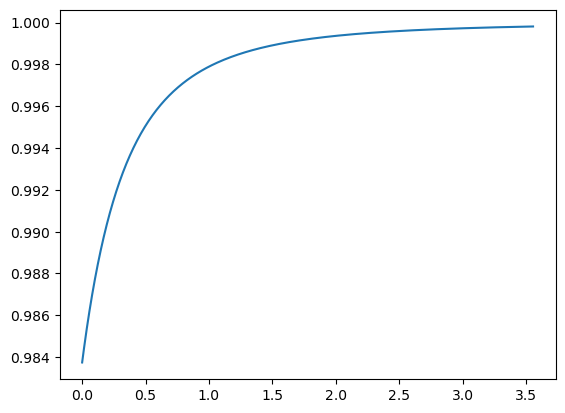

In [41]:
redshifts =  np.exp(-N) - 1
N_trial = N_efolds(0.81)
from scipy import interpolate
print(redshifts[1200])
x = redshifts[1200:]
y=(omega_m[1200:])
f = interpolate.interp1d(x, y,fill_value="extrapolate")
#rint(f([redshifts])
plt.plot(x,y)
print(f(0.0001))


In [169]:
print(H)

[3431857.9255956714, 3414034.758264301, 3396304.154582309, 3378665.6338254153, 3361118.7177659613, 3343662.9306599363, 3326297.7992340806, 3309022.8526730496, 3291837.6226066668, 3274741.6430971962, 3257734.4506267286, 3240815.584084608, 3223984.584754936, 3207240.9963041255, 3190584.3647685363, 3174014.2385421568, 3157530.1683643893, 3141131.7073078114, 3124818.410766114, 3108589.8364420347, 3092445.5443353425, 3076385.096730924, 3060408.0581869376, 3044513.99552295, 3028702.4778082464, 3012973.0763501367, 2997325.364682306, 2981758.9185532755, 2966273.315914892, 2950868.1369108898, 2935542.9638654985, 2920297.3812721283, 2905130.9757820945, 2890043.33619343, 2875034.0534397135, 2860102.720578973, 2845248.9327826975, 2830472.2873248104, 2815772.383570771, 2801148.822966729, 2786601.209028689, 2772129.147331761, 2757732.245499508, 2743410.1131932586, 2729162.3621015497, 2714988.6059295926, 2700888.460388799, 2686861.543186363, 2672907.474014895, 2659025.8745421073, 2645216.3684005733, 

998.3834616454124
H at redshift 0.26 is 54.2


Text(0.5, 1.0, "Predicted Hubble's constant as a function of z")

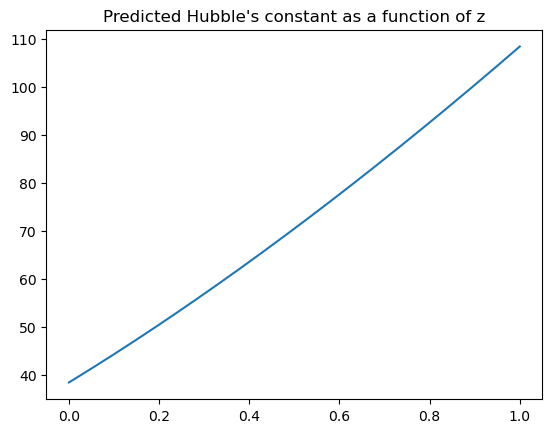

In [176]:
redshifts =  np.exp(-N) - 1
print(redshifts[200])
H_fitted=[]
lim = 3000
for i in (redshifts[lim:3500]):
    H_fitted.append(f(i))
print(f"H at redshift {np.round(redshifts[4000],2)} is {np.round(H[4000],2)}")
plt.plot(redshifts[lim:4500],H[lim:4500])
#plt.plot(redshifts[lim:],H_fitted)
#plt.plot(redshifts,phi_pr)
#plt.xlim(0,1)
#plt.ylim(0,250)
plt.title("Predicted Hubble's constant as a function of z")
#print(scipy.integrate.OdeSolution.__call__(N_efolds(0.81)))

In [964]:
def Chi_sq(parameters,Ho,Ho_bar,sigma_Ho,H_obs,sigma_obs,z_obs,N):
    omega,alpha=parameters
    soln = odeint(KG_eqn, y0(alpha), N, args=(parameters,Ho))
    phi=soln[:,0]
    phi_pr=soln[:,1]
    #print(f"phi:{phi.shape},phi_pr:{phi_pr.shape}")
    H_theo= np.sqrt(Hsq( parameters,Ho,phi,phi_pr,N))
   
    redshifts =  np.exp(-N) - 1
    limit=4800
    x = redshifts[limit:]
    y= H_theo[limit:]
    invalid_indices_inf = np.where(np.isinf(y))
    invalid_indices_nan = np.where(np.isnan(y))
    invalid_indices = np.hstack((invalid_indices_inf,invalid_indices_nan))
    y=np.delete(y,invalid_indices)
    x=np.delete(x,invalid_indices)
    #print(f"invalid indices:{x.shape}")
    f = interpolate.interp1d(x, y,fill_value="extrapolate")
    H_theo_new = f(z_obs)
    print(H_theo_new)
    n=len(sigma_obs)
    chi_sq=0
    for i in range(n):
        if(H_theo_new[i] > 0 and H_theo_new[i]<1000):
            chi_sq= chi_sq+((H_theo_new[i]-H_obs[i])/sigma_obs[i])**2
    #print(f"chi_sq:{chi_sq}")
    return chi_sq
    

    
    

In [834]:
def Marg_Chi_sq(parameters,Ho_bar,sigma_Ho,H_obs,sigma_obs,z_obs,N):
    #chi_sq= Chi_sq(parameters,Ho,Ho_bar,sigma_Ho,H_obs,sigma_obs,z_obs,N)
    #likelihood= np.exp(-chi_sq/2)
    marg_likelihood =  integrate.quad(integrand_marg_likelihood, 0.01, 200, args=(parameters,Ho_bar,sigma_Ho,H_obs,sigma_obs,z_obs,N,))[0]
    print(f"marg_likelihood:{marg_likelihood}")
    return (-2*np.log(marg_likelihood))
    

In [835]:
def integrand_marg_likelihood(Ho,parameters,Ho_bar,sigma_Ho,H_obs,sigma_obs,z_obs,N):
    #Here Ho_prime is not the differential of Ho. Instead it is actually the variable over ehich we'll integrate
    chi_sq= Chi_sq(parameters,Ho,Ho_bar,sigma_Ho,H_obs,sigma_obs,z_obs,N)
    likelihood= np.exp(-chi_sq/2)
    gaussian = np.exp(-(Ho-Ho_bar)**2/(2*sigma_Ho**2))/np.sqrt(2*np.pi*sigma_Ho**2)
    return likelihood*gaussian
    

In [815]:
#def Marg_Chi_sq(parameters,Ho_bar,sigma_Ho,H_obs,sigma_obs,z_obs,N):
    #return (-2*np.log(Marg_Likelihood(parameters,Ho_bar,sigma_Ho,H_obs,sigma_obs,z_obs,N)))

In [836]:
Data = pd.read_csv("Hdata - Table 1.csv")
print(Data)
Data = Data.to_numpy()
z_obs = Data[:,1]
H_obs = Data[:,2]
sigma_obs = Data[:,3]
print(z_obs)

    Unnamed: 0      z      H  Sigma
0          NaN  0.070   69.0   19.6
1          NaN  0.100   69.0   12.0
2          NaN  0.120   68.6   26.2
3          NaN  0.170   83.0    8.0
4          NaN  0.179   75.0    4.0
5          NaN  0.199   75.0    5.0
6          NaN  0.200   72.9   29.6
7          NaN  0.270   77.0   14.0
8          NaN  0.280   88.8   36.6
9          NaN  0.350   76.3    5.6
10         NaN  0.352   83.0   14.0
11         NaN  0.400   95.0   17.0
12         NaN  0.440   82.6    7.8
13         NaN  0.480   97.0   62.0
14         NaN  0.593  104.0   13.0
15         NaN  0.600   87.9    6.1
16         NaN  0.680   92.0    8.0
17         NaN  0.730   97.3    7.0
18         NaN  0.781  105.0   12.0
19         NaN  0.875  125.0   17.0
20         NaN  0.880   90.0   40.0
21         NaN  0.900  117.0   23.0
22         NaN  1.037  154.0   20.0
23         NaN  1.300  168.0   17.0
24         NaN  1.430  177.0   18.0
25         NaN  1.530  140.0   14.0
26         NaN  1.750  202.0

In [900]:
best_fit_params1 = minimize (Marg_Chi_sq,x0=[0.30,0.0005],args=(68,2.8,H_obs,sigma_obs,z_obs,N),bounds=[(0,2),(-1,1)])
print(best_fit_params1)
print(np.round((best_fit_params1.x),2))
print(np.round((best_fit_params1.fun),2))

<ipython-input-827-e42e0297d925>:5: RuntimeWarning: invalid value encountered in log
  P2= kappa(alpha)*(np.exp((-alpha)*np.log(phi)))/12
<ipython-input-885-3bf6cdf1d518>:7: RuntimeWarning: invalid value encountered in double_scalars
  dydt = [phi_pr,-(3.0 + HdotoH2)*phi_pr - kappa_alpha*(phi**(-alpha-1))/(2*Hsquared) ]
<ipython-input-827-e42e0297d925>:5: RuntimeWarning: divide by zero encountered in log
  P2= kappa(alpha)*(np.exp((-alpha)*np.log(phi)))/12
<ipython-input-827-e42e0297d925>:6: RuntimeWarning: overflow encountered in square
  P3= 1- ((phi_pr)**2)/12
<ipython-input-827-e42e0297d925>:7: RuntimeWarning: invalid value encountered in true_divide
  return (P1+P2)/P3
<ipython-input-895-7d2a01fac2cf>:7: RuntimeWarning: invalid value encountered in sqrt
  H_theo= np.sqrt(Hsq( parameters,Ho,phi,phi_pr,N))


marg_likelihood:1.000000000000001
marg_likelihood:1.000000000000001
marg_likelihood:1.000000000000001
      fun: -2.220446049250312e-15
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([0., 0.])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 3
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([0.3   , 0.0005])
[0.3 0. ]
-0.0


In [976]:
print(Chi_sq([0.29,0.0001],74,68,2.8,H_obs,sigma_obs,z_obs,N))

[ 46.73843358  49.07050131  50.6783947   54.90566107  55.70094723
  57.50942125  57.60135957  64.4505272   65.50272627  73.5063504
  73.75359464  79.74192816  84.73317609  89.72442402 103.82469943
 104.69816781 114.68066368 120.91972359 127.2835647  139.01299734
 139.63690333 142.1325273  159.22755146 192.0450066  208.26656238
 220.74468221 248.19654583 316.82620487]
263.60732117728344


<ipython-input-827-e42e0297d925>:5: RuntimeWarning: invalid value encountered in log
  P2= kappa(alpha)*(np.exp((-alpha)*np.log(phi)))/12
<ipython-input-885-3bf6cdf1d518>:7: RuntimeWarning: invalid value encountered in double_scalars
  dydt = [phi_pr,-(3.0 + HdotoH2)*phi_pr - kappa_alpha*(phi**(-alpha-1))/(2*Hsquared) ]
<ipython-input-827-e42e0297d925>:5: RuntimeWarning: divide by zero encountered in log
  P2= kappa(alpha)*(np.exp((-alpha)*np.log(phi)))/12
<ipython-input-827-e42e0297d925>:6: RuntimeWarning: overflow encountered in square
  P3= 1- ((phi_pr)**2)/12
<ipython-input-827-e42e0297d925>:7: RuntimeWarning: invalid value encountered in true_divide
  return (P1+P2)/P3
<ipython-input-964-14e45ff3c626>:7: RuntimeWarning: invalid value encountered in sqrt
  H_theo= np.sqrt(Hsq( parameters,Ho,phi,phi_pr,N))


In [968]:
z_initial = 2100
z_final = 0
N_initial = N_efolds(z_initial)
N_final = N_efolds(z_final)
timesteps = 5000
N = np.linspace(N_initial, N_final, timesteps)
redshifts =  np.exp(-N) - 1
print(redshifts[4000])

3.612682008024761


In [957]:
print(-2*np.log(0.09814992513745828))

4.642518241991984


In [63]:
print(2.36874500e-05**(-0.01))

1.1123842134671111
